In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nubb = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "data")
nubb_meta = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "meta")
display(nubb)
display(nubb_meta)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/ATPC_0nubb_1bar_nodiff_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_nubb      = pickle.load(pickle_file)
    connections_nubb = pickle.load(pickle_file)
    connection_counts_nubb = pickle.load(pickle_file)

Tl = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "data")
Tl_meta = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "meta")
display(Tl)
display(Tl_meta)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/ATPC_Tl_1bar_nodiff_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_Tl      = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)




,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle,Tortuosity
0,125,-1903.222046,-1298.644938,1487.571655,0.141236,14,1,0,0.000000,0.000000,1.753804
1,125,-1924.799316,-1312.026245,1478.012878,0.025941,12,1,0,27.129471,25.849308,2.334197
2,125,-1930.393433,-1328.148560,1465.277344,0.018154,10,1,0,48.423062,37.520830,2.309231
3,125,-1906.222371,-1335.432576,1453.564819,0.032265,9,1,0,76.252548,77.190344,2.451175
4,125,-1892.235229,-1365.352539,1447.470459,0.020460,0,1,0,109.838044,47.835838,2.666347
...,...,...,...,...,...,...,...,...,...,...,...
147,1309,-1737.257141,2332.912598,617.453522,0.008630,94,1,0,3445.912803,68.557021,1.589627
148,1309,-1758.253499,2318.273031,619.403239,0.053841,92,1,0,3471.583124,67.188117,1.733869
149,1309,-1759.325073,2309.595703,623.264587,0.038713,89,1,0,3481.141068,50.198306,1.903926
150,1309,-1776.827759,2315.192627,632.481201,0.063662,91,1,0,3501.698682,88.315006,2.094955


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,125,0,1,14,111,3339.136,2.457110,0.625530,0.545402,2.199838,2.334565,Primary
0,126,0,1,35,64,3483.548,2.437890,0.598350,0.569433,1.835691,2.562163,Primary
0,126,1,0,0,0,0.000,0.022494,0.022494,0.022494,1.000000,1.000000,Brem
0,127,0,1,117,118,2858.363,2.300101,0.549494,0.508871,2.774625,1.925596,Primary
0,127,1,0,0,0,0.000,0.029537,0.029537,0.029537,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1308,1,0,15,15,0.000,0.030157,0.030157,0.030157,1.000000,1.000000,Brem
0,1308,2,0,20,20,0.000,0.060066,0.060066,0.060066,1.000000,1.000000,Brem
0,1308,3,0,63,63,0.000,0.030281,0.030281,0.030281,1.000000,1.000000,Brem
0,1309,0,1,22,91,3501.699,2.434517,0.541880,0.518965,3.003698,1.610181,Primary


,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle,Tortuosity
0,126000,-858.295135,888.656494,2253.111694,0.010490,82,1,0,0.000000,0.000000,1.010562
1,126000,-847.358276,872.564636,2249.312500,0.008878,80,1,0,19.824143,108.325910,1.009416
2,126000,-842.242737,864.213501,2247.264648,0.005878,78,1,0,29.829337,2.765453,1.019767
3,126000,-834.186737,848.861511,2243.920532,0.009027,76,1,0,47.486229,3.832399,1.036883
4,126000,-824.459961,823.736979,2236.411051,0.018848,71,1,0,75.454865,7.874077,1.046066
...,...,...,...,...,...,...,...,...,...,...,...
126,360059,-277.021729,-2549.601807,2583.852051,0.008085,95,0,1,87.096192,38.955764,1.182740
127,360059,-278.041519,-2567.083984,2571.078125,0.023510,85,0,1,108.771978,60.102902,1.182740
128,360059,-262.410660,-2574.370728,2559.272949,0.035935,81,0,1,129.671322,54.626934,1.182740
129,360059,-247.821480,-2573.997681,2543.334717,0.036382,82,0,1,151.281749,23.724144,1.223980


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,126000,0,1,82,120,68.675,2.049274,0.590786,0.261863,2.865280,1.038937,Primary
0,126000,1,0,52,52,0.000,0.029735,0.029735,0.029735,1.000000,1.000000,Brem
0,126000,2,0,137,139,68.675,0.165912,0.165912,0.165912,1.256059,1.256059,Brem
0,126000,3,0,132,134,22.235,0.090594,0.090594,0.090594,1.008913,1.008913,Brem
0,126000,4,0,135,136,22.235,0.143344,0.143344,0.143344,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,360057,3,0,144,146,32.627,0.141137,0.141137,0.141137,1.135385,1.135385,Brem
0,360058,0,1,0,66,53.973,2.133792,0.515394,0.341149,2.256718,1.022118,Primary
0,360058,1,0,146,149,53.973,0.184785,0.184785,0.184785,1.069090,1.069090,Brem
0,360059,0,1,45,48,2346.758,2.022291,0.613205,0.243065,3.258269,1.040130,Primary


In [5]:
print(len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()))

175507
170937


{0: [1], 1: [0, 4], 2: [3, 5], 3: [2, 7], 4: [14, 1], 14: [4, 15, 18], 5: [2, 8], 6: [10, 11], 10: [6, 13], 7: [12, 3], 12: [7, 16], 8: [9, 5], 9: [8], 13: [10, 17], 11: [16, 6], 16: [11, 12], 17: [13, 20], 15: [14, 19], 20: [17, 21], 19: [15, 21], 21: [20, 19], 22: [18, 23], 18: [22, 14], 23: [22, 24], 24: [23, 25], 25: [26, 24], 26: [25, 27], 27: [26, 28], 28: [29, 27], 29: [28, 30], 30: [29, 31], 31: [30, 32], 32: [31, 33], 33: [34, 32], 34: [33, 35], 35: [34, 36], 36: [48, 35], 48: [36, 51], 37: [39, 38], 39: [37, 41], 38: [40, 37], 40: [38, 43], 41: [39, 42], 43: [40, 46], 42: [41, 45], 45: [42, 44], 44: [45, 47], 46: [43, 49], 47: [44, 50], 49: [46, 52], 50: [47, 53], 51: [55, 48], 55: [51, 59], 52: [54, 49], 54: [52, 56], 53: [57, 50], 57: [53, 60], 56: [54, 58], 59: [55, 62], 60: [57, 63], 58: [56, 61], 62: [59, 65], 63: [60, 66], 61: [58, 64], 66: [63, 70], 64: [67, 61], 67: [64, 69], 65: [62, 68], 68: [65, 71], 69: [72, 67], 72: [69, 73], 70: [66, 71], 71: [68, 70], 73: [72, 

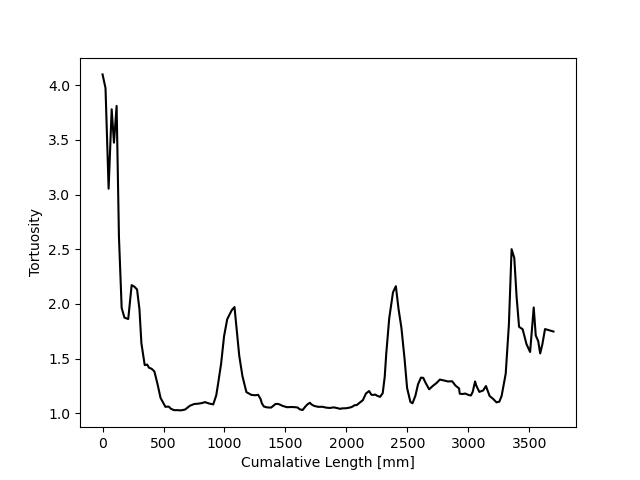

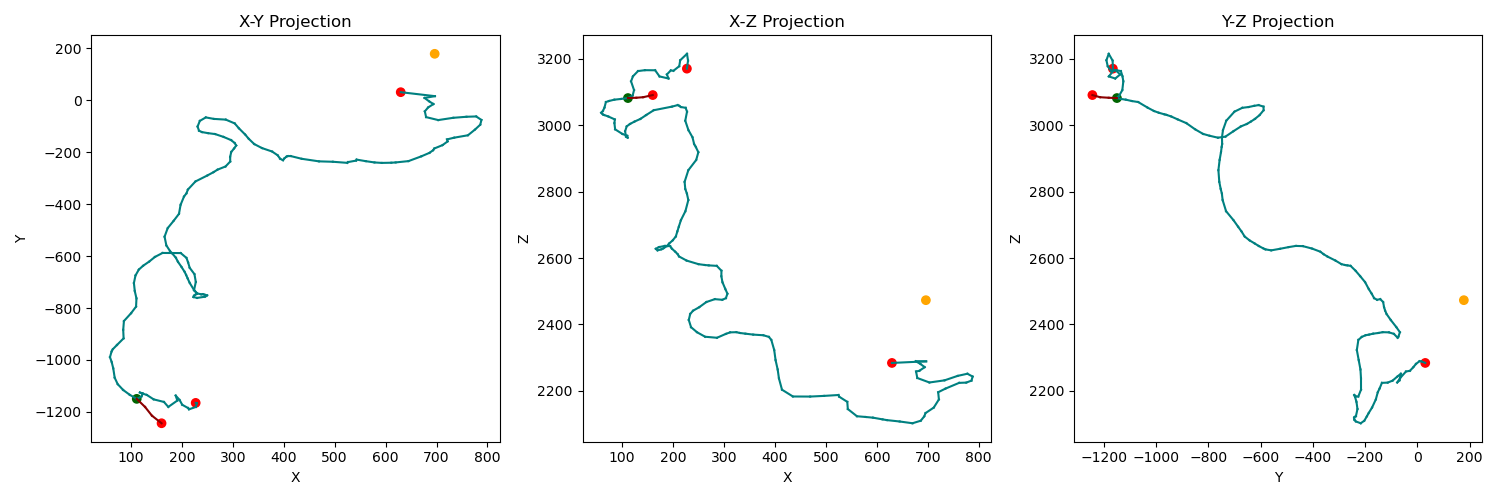

: 

In [102]:
%matplotlib widget


evid = 26984036
evid= Tl_topology_evts[16]

event = Tl[Tl.event_id == evid]
event.index = event.id
Track = Tracks_Tl[evid]
connection = connections_Tl[evid]
connection_count = connection_counts_Tl[evid]


# event = nubb[nubb.event_id == evid]
# event.index = event.id
# Track = Tracks_nubb[evid]
# connection = connections_nubb[evid]
# connection_count = connection_counts_nubb[evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

plt.tight_layout()

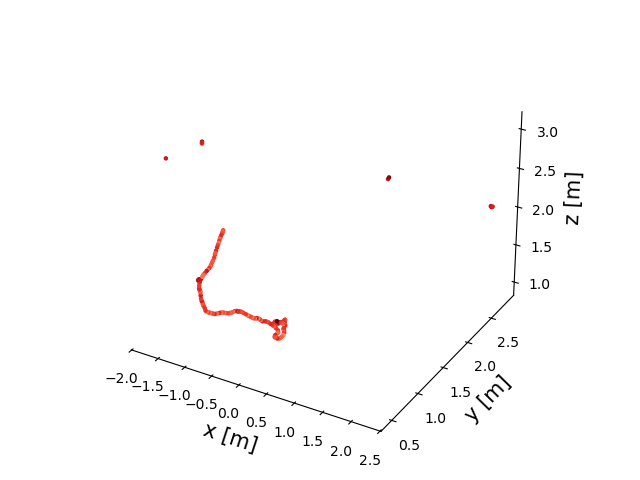

In [7]:
# 3D event display
%matplotlib widget


ids = Tl.event_id.unique()
# id_ = ids[48]
id_ = 126000

event = Tl[Tl.event_id == id_]

ax = plt.figure().add_subplot(projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.scatter(event.x/1000,event.y/1000, event.z/1000, c = event.energy, s = 5, cmap='BuGn', alpha=1, norm=mcolors.LogNorm())
ax.scatter(event.x/1000,event.y/1000, event.z/1000, c = event.energy, s = 5, cmap='Reds', alpha=1, norm=mcolors.LogNorm())


ax.set_xlabel("x [m]", fontsize = 15)
ax.set_ylabel("y [m]", fontsize = 15)
ax.set_zlabel("z [m]", fontsize = 15)
ax.tick_params(axis='both', which='both', labelsize=10)  # Adjust labelsize as needed

# Remove the background grid panes and gridlines
ax.xaxis.pane.set_edgecolor('none')  # Removes the edges
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')
ax.xaxis.pane.set_visible(False)  # Removes the background pane
ax.yaxis.pane.set_visible(False)
ax.zaxis.pane.set_visible(False)
ax.grid(False)  # Remove the gridlines

plt.savefig(f"plots/Dave/Background_Evt{id_}.pdf")
plt.tight_layout()


175507 68127  Eff =  38.81725515221615
170937 156  Eff =  0.09126169290440338
[ 2778006 26984036 27192021 27218053 27946049 28752025 29896007  3090020
 30286004 30338055 30494017 31118052 31378047 31690017 33562015 33692013
 33978055  3506033 34862012 35772018 35772028 35798052 35928056 35954058
 36292048 36734031 36786028 36812040 37800041 38840033 39204053 39308002
 40400044 40634046 42194027 42636017  4364016 42870051 43364025 43806037
 44014012 44430005 44534015  4598004 45236018 45756035 45886005 46484025
 47524008  4858044 47758042  4884024 49526024 49630013 49838028 50124059
 50150053 50956044 51060025 51866038 52152035 53686011 53842042 54544035
 54648029 55038004 55584041 55974029  5690026 56104022 57040017 57482012
 57742053 57872024 59510031 59900030  6106018 61070025 61200027 61356031
 61694025 62890021  6496008 64814006 65074014 65152016 65256013 66218059
 66452019 66816006 66868007 68324002 68818016 68844019 69208032 69546050
 69624029 69832049 70508051 70742044 70924059 

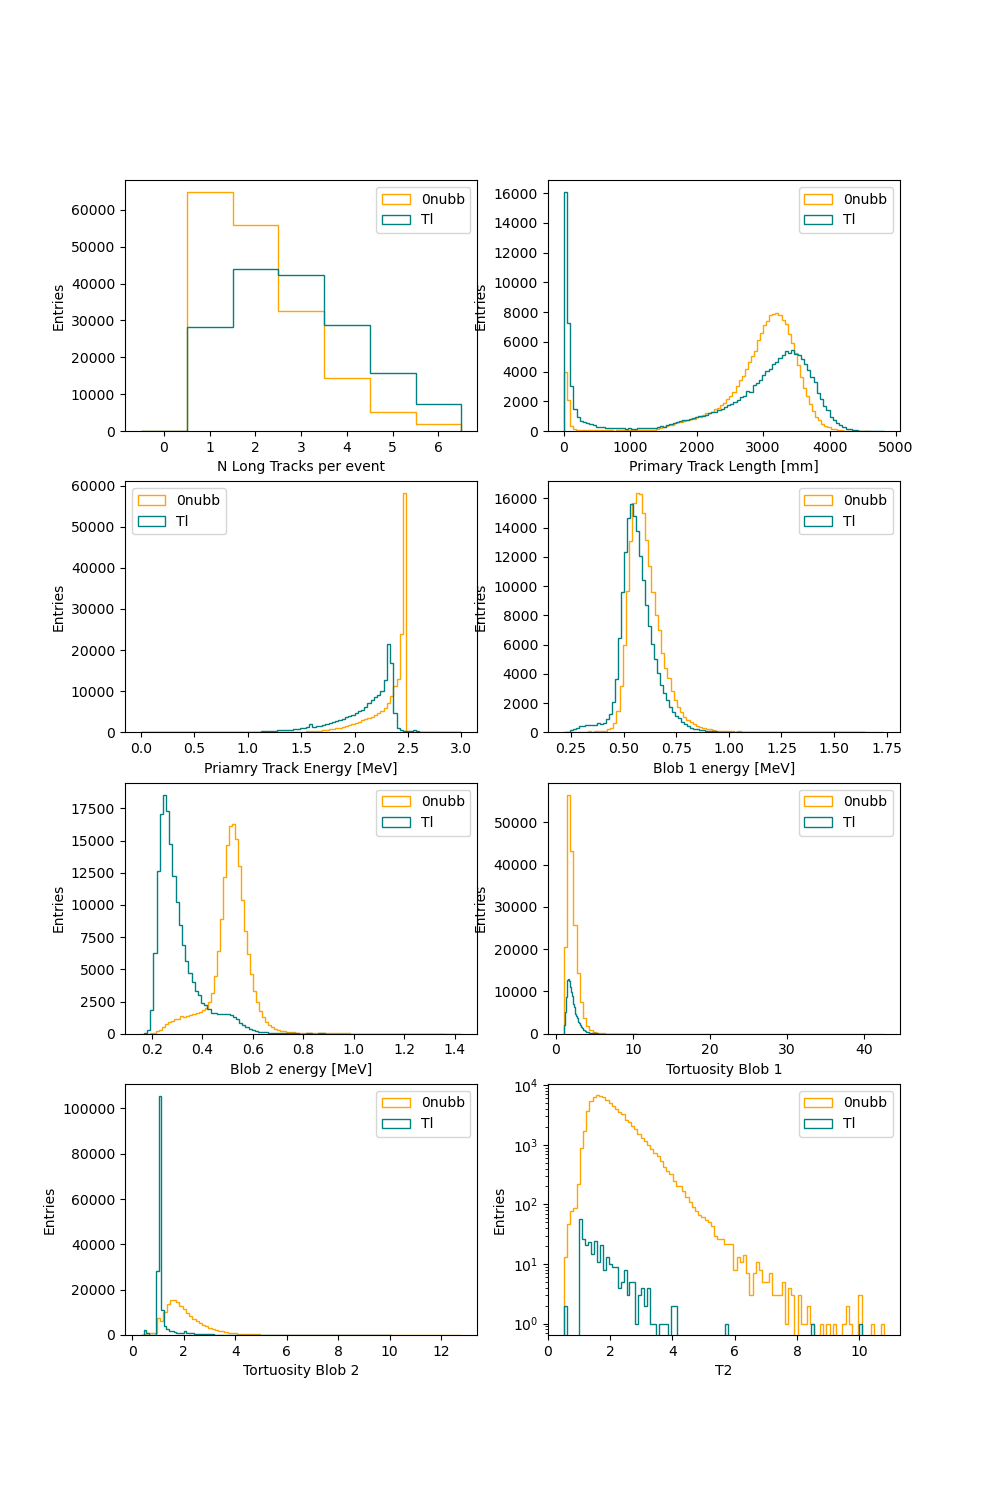

In [63]:
# Plot some variables like number of tracks


def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


nubb_counts = GetNLongTracks(nubb_meta)
Tl_counts = GetNLongTracks(Tl_meta)
nubb_counts_evts = nubb_counts[nubb_counts.N_tracks >= 1].event_id.unique()
Tl_counts_evts = Tl_counts[Tl_counts.N_tracks >= 1].event_id.unique()


bin_edges = np.arange(-0.5, 7.5, 1)
bin_centers = np.arange(0, 7, 1)


fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Multiplicities
axs[0,0].hist(nubb_counts.N_tracks, bins = bin_edges, histtype="step", color = "orange", label = "0nubb");
axs[0,0].hist(Tl_counts.N_tracks, bins = bin_edges, histtype="step", color = "Teal", label = "Tl");
axs[0,0].set_xlabel("N Long Tracks per event")
axs[0,0].set_ylabel("Entries")
axs[0,0].set_xticks(bin_centers) ;
axs[0,0].legend()


nubb_primary = nubb_meta[nubb_meta.primary == 1]
Tl_primary = Tl_meta[Tl_meta.primary == 1]

axs[1,0].hist(nubb_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = "orange", label = "0nubb");
axs[1,0].hist(Tl_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = "Teal", label = "Tl");
axs[1,0].set_xlabel("Priamry Track Energy [MeV]")
axs[1,0].set_ylabel("Entries")
axs[1,0].legend()

axs[0,1].hist(nubb_primary.length, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[0,1].hist(Tl_primary.length, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[0,1].set_xlabel("Primary Track Length [mm]")
axs[0,1].set_ylabel("Entries")
axs[0,1].legend()

axs[1,1].hist(nubb_primary.blob1, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[1,1].hist(Tl_primary.blob1, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[1,1].set_xlabel("Blob 1 energy [MeV]")
axs[1,1].set_ylabel("Entries")
axs[1,1].legend()

axs[2,0].hist(nubb_primary.blob2, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[2,0].hist(Tl_primary.blob2, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[2,0].set_xlabel("Blob 2 energy [MeV]")
axs[2,0].set_ylabel("Entries")
axs[2,0].legend()

axs[2,1].hist(nubb_primary.Tortuosity1, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[2,1].hist(Tl_primary.Tortuosity1, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[2,1].set_xlabel("Tortuosity Blob 1")
axs[2,1].set_ylabel("Entries")
axs[2,1].legend()

axs[3,0].hist(nubb_primary.Tortuosity2, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[3,0].hist(Tl_primary.Tortuosity2, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[3,0].set_xlabel("Tortuosity Blob 2")
axs[3,0].set_ylabel("Entries")
axs[3,0].legend()


E_cut = 0.43
axs[3,1].hist(nubb_primary[ (nubb_primary.energy>2.4) & (nubb_primary.event_id.isin(nubb_counts_evts)) & (nubb_primary.blob2 > E_cut) ].Tortuosity2, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[3,1].hist(Tl_primary[ (Tl_primary.energy>2.4) & (Tl_primary.event_id.isin(Tl_counts_evts)) & (Tl_primary.blob2 > E_cut) ].Tortuosity2, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[3,1].set_xlabel("T2")
axs[3,1].set_ylabel("Entries")
axs[3,1].legend()
axs[3,1].semilogy()

nubb_topology_evts = nubb_primary[ (nubb_primary.energy>2.4) & (nubb_primary.event_id.isin(nubb_counts_evts)) & (nubb_primary.blob2 > E_cut) & (nubb_primary.Tortuosity2 > 1.5) ].event_id.unique()
Tl_topology_evts = Tl_primary[ (Tl_primary.energy>2.4) & (Tl_primary.event_id.isin(Tl_counts_evts)) & (Tl_primary.blob2 > E_cut) & (Tl_primary.Tortuosity2 > 1.5) ].event_id.unique()


print(len(nubb.event_id.unique()), len(nubb_topology_evts), " Eff = ", 100 * len(nubb_topology_evts)/len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_topology_evts), " Eff = ", 100 * len(Tl_topology_evts)/len(Tl.event_id.unique()))

print(Tl_topology_evts) 


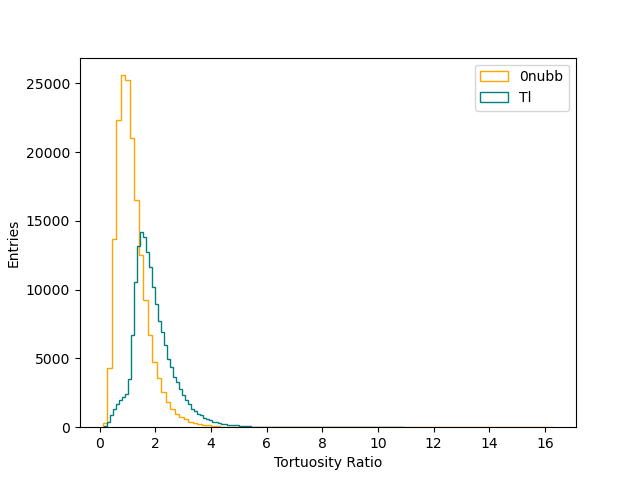

In [85]:
plt.figure()
plt.hist(nubb_primary.Tortuosity1/nubb_primary.Tortuosity2, bins = 100, histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_primary.Tortuosity1/Tl_primary.Tortuosity2, bins = 100, histtype="step", color = "Teal", label = "Tl");
plt.xlabel("Tortuosity Ratio")
plt.ylabel("Entries")
plt.legend()


In [52]:
# Calculate the tortuosity and add it to the dataframe
def CalcTortuosity2(df_angles):

    # df_angles['distance_diff'] = df_angles.groupby(['event_id', 'trkID'])['cumulative_distance'].diff().fillna(0)

    df_angles["Tortuosity2"] = 1.0

    Tortuosity = []

    window = 5

    for trkID in df_angles.trkID.unique():

        # Get the track
        trk_df = df_angles[df_angles.trkID == trkID]

        # Try to dynamically calculate the window size by splitting into 100 pieces
        window = int(len(trk_df)/100 + 1)
        if window < 5:
            window = 5

        window=10

        # Loop over the nodes in the track
        for index in range(len(trk_df)):

            start = max(0, index - window)  # Prevent going below index 0
            end = min(len(trk_df), index + window + 1)  # Prevent exceeding last index
            
            temp_df = trk_df.iloc[start:end]

            point1 = temp_df.iloc[0]
            point2 = temp_df.iloc[-1]
            segment_length = calculate_distance(point1, point2)

            # Avoids division by zero
            if (segment_length == 0):
                segment_length = 1

            # Get the diff between each row
            cum_distance = 0
            for i in range(1, len(temp_df)):
                
                prev_point = temp_df.iloc[i - 1][['x', 'y', 'z']].to_numpy()
                curr_point = temp_df.iloc[i][['x', 'y', 'z']].to_numpy()
                cum_distance+=euclidean_distance(curr_point,prev_point)

            Tortuosity.append(cum_distance/segment_length)

    df_angles["Tortuosity2"] = Tortuosity

    return df_angles


def GetEndTortuosity2(df, T_threshold):
    df_T1 = df[df.cumulative_distance < T_threshold]
    T1 = df_T1["Tortuosity2"].mean()

    end_threshold = max(df.cumulative_distance) - T_threshold
    df_T2 = df[df['cumulative_distance'] > end_threshold]
    T2 = df_T2["Tortuosity2"].mean()

    if T1 == 0:
        T1 = 1.0
    if T2 == 0:
        T2 = 1.0

    return T1, T2

27192021


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_30908/4165591120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angles["Tortuosity2"] = 1.0


1.1699993776702822 1.9484748486584331


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_30908/4165591120.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angles["Tortuosity2"] = Tortuosity


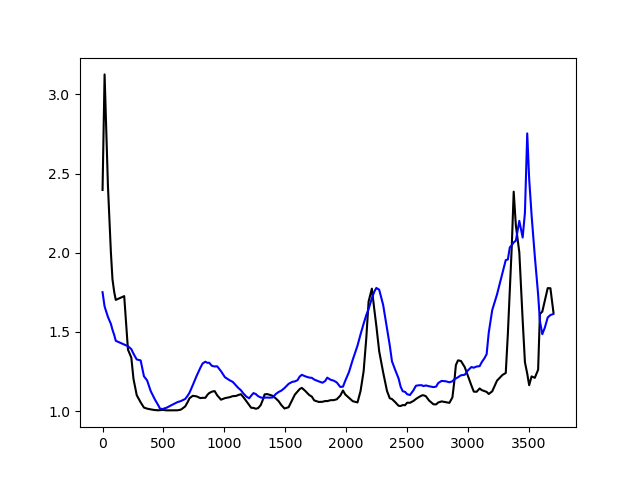

In [53]:
# See if any refinements to the blob and tortuality can be made

event_bkg = Tl_topology_evts[4]
print(event_bkg)

Tl_cuts = Tl[Tl.event_id.isin([event_bkg])]

Tl_cuts = CalcTortuosity2(Tl_cuts)

# display(Tl_cuts)

plt.figure()

T1, T2 = GetEndTortuosity2(Tl_cuts, 500)
print(T1,T2)

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(Tl_cuts[ Tl_cuts.primary == 1 ].cumulative_distance, Tl_cuts[ Tl_cuts.primary == 1 ].Tortuosity, color="k");
plt.plot(Tl_cuts[ Tl_cuts.primary == 1 ].cumulative_distance, Tl_cuts[ Tl_cuts.primary == 1 ].Tortuosity2, color="b");
